# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
headers = [header.get_text() for header in rows[0].find_all('th')]

In [7]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skip the header row
    cells = row.find_all('td')
    row_data = [cell.get_text() for cell in cells]
    data.append(row_data)


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data, columns=headers)

In [10]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
mars_weather_df['id'] = mars_weather_df['id'].astype(str)  # Keep id as object (string)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])  # Convert to datetime
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)  # Convert sol to integer
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)  # Convert solar longitude to integer
mars_weather_df['month'] = mars_weather_df['month'].astype(int)  # Convert Martian month to integer
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)  # Convert min_temp to float
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)  # Convert pressure to float


In [13]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
num_months = mars_weather_df['month'].nunique()

print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [15]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_weather_df['sol'].nunique()

print(f"There are {num_sols} Martian days worth of data in the dataset.")

There are 1867 Martian days worth of data in the dataset.


In [16]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Display the results
print("Average Minimum Temperature by Month:")
print(avg_min_temp_by_month)

Average Minimum Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


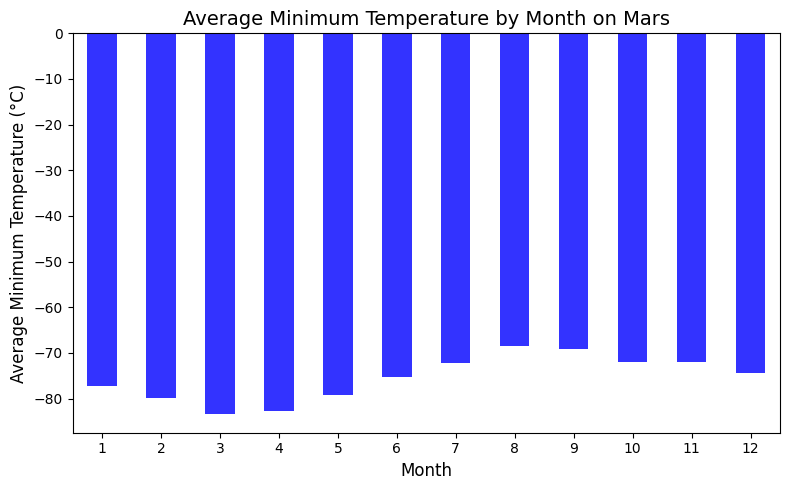

In [18]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', figsize=(8, 5), color='blue', alpha=0.8)

# Add chart title and labels
plt.title('Average Minimum Temperature by Month on Mars', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Find the coldest and warmest months
coldest_month = avg_min_temp_by_month.idxmin()
warmest_month = avg_min_temp_by_month.idxmax()

print(f"The coldest month on Mars is month {coldest_month}.")
print(f"The warmest month on Mars is month {warmest_month}.")

The coldest month on Mars is month 3.
The warmest month on Mars is month 8.


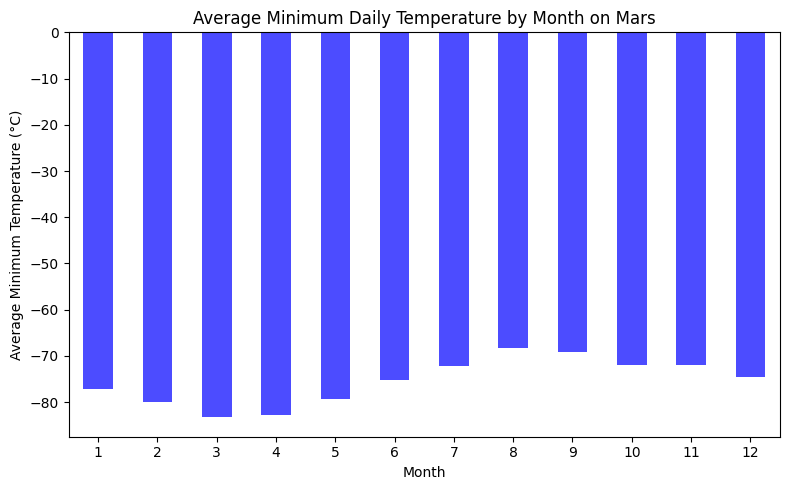

In [20]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
import matplotlib.pyplot as plt

# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', figsize=(8, 5), color='blue', alpha=0.7)
plt.title('Average Minimum Daily Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Display the results
print("Average Pressure by Month:")
print(avg_pressure_by_month)

Average Pressure by Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


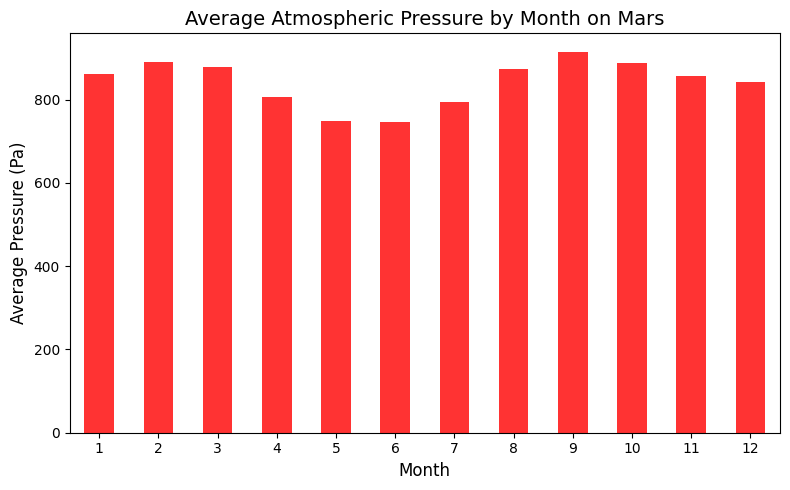

In [23]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', figsize=(8, 5), color='red', alpha=0.8)

# Add chart title and labels
plt.title('Average Atmospheric Pressure by Month on Mars', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Identify the lowest and highest pressure months
lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()

print(f"The month with the lowest average pressure is Month {lowest_pressure_month}, with a pressure of {sorted_avg_pressure.min():.2f} Pa.")
print(f"The month with the highest average pressure is Month {highest_pressure_month}, with a pressure of {sorted_avg_pressure.max():.2f} Pa.")

The month with the lowest average pressure is Month 6, with a pressure of 745.05 Pa.
The month with the highest average pressure is Month 9, with a pressure of 913.31 Pa.


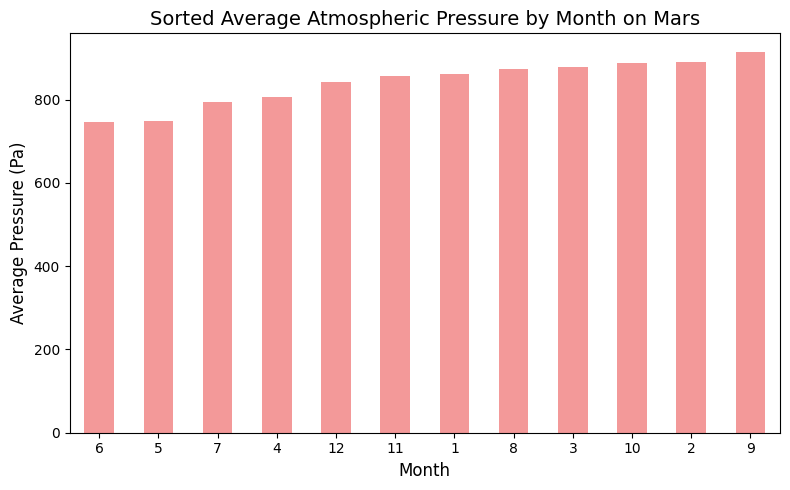

In [26]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure.plot(kind='bar', figsize=(8, 5), color='lightcoral', alpha=0.8)

# Add chart title and labels
plt.title('Sorted Average Atmospheric Pressure by Month on Mars', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Pressure (Pa)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

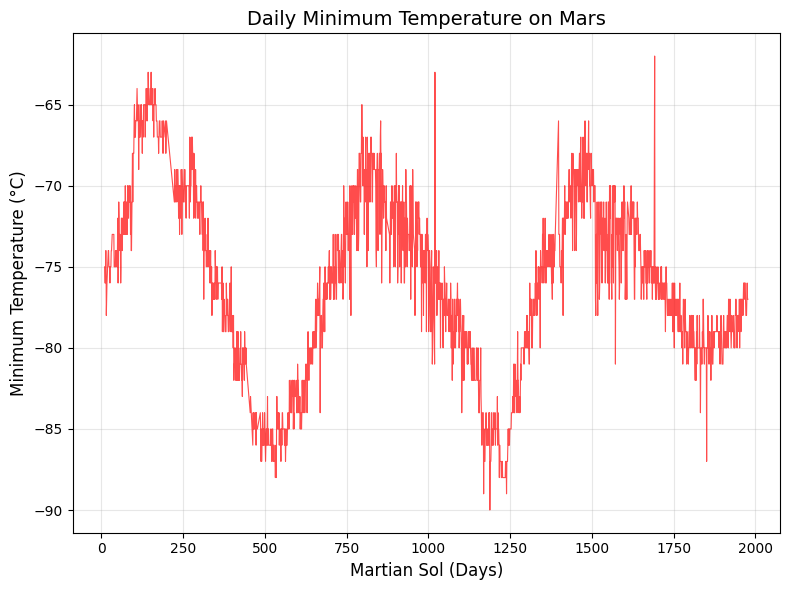

In [29]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(8, 6))
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], color='red', alpha=0.7, linewidth=0.8)

# Add chart title and labels
plt.title('Daily Minimum Temperature on Mars', fontsize=14)
plt.xlabel('Martian Sol (Days)', fontsize=12)
plt.ylabel('Minimum Temperature (°C)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

#### Minimum Temperature

Seasonal variations in temperature will indicate which months are colder and warmer.
The bar chart provides a clear visual understanding of temperature fluctuations throughout the Martian year.

#### Atmospheric Pressure

Atmospheric pressure variations can indicate seasonal changes in the Martian environment.
Months with the lowest pressure might coincide with specific environmental conditions (e.g., dust storms).

#### Year Length 
The daily minimum temperature plot will show repeating patterns corresponding to Martian seasons.
By identifying one complete cycle, we can estimate the length of a Martian year in sols and Earth days (approximately 687 Earth days).

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [30]:
# Write the data to a CSV
output_file = 'mars_weather_data.csv'

# Write the DataFrame to a CSV file
mars_weather_df.to_csv(output_file, index=False)

print(f"Data successfully saved to {output_file}")

Data successfully saved to mars_weather_data.csv


In [31]:
browser.quit()